In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

datetime.now()

datetime.datetime(2023, 3, 22, 9, 11, 15, 907402)

读取星表

'start'

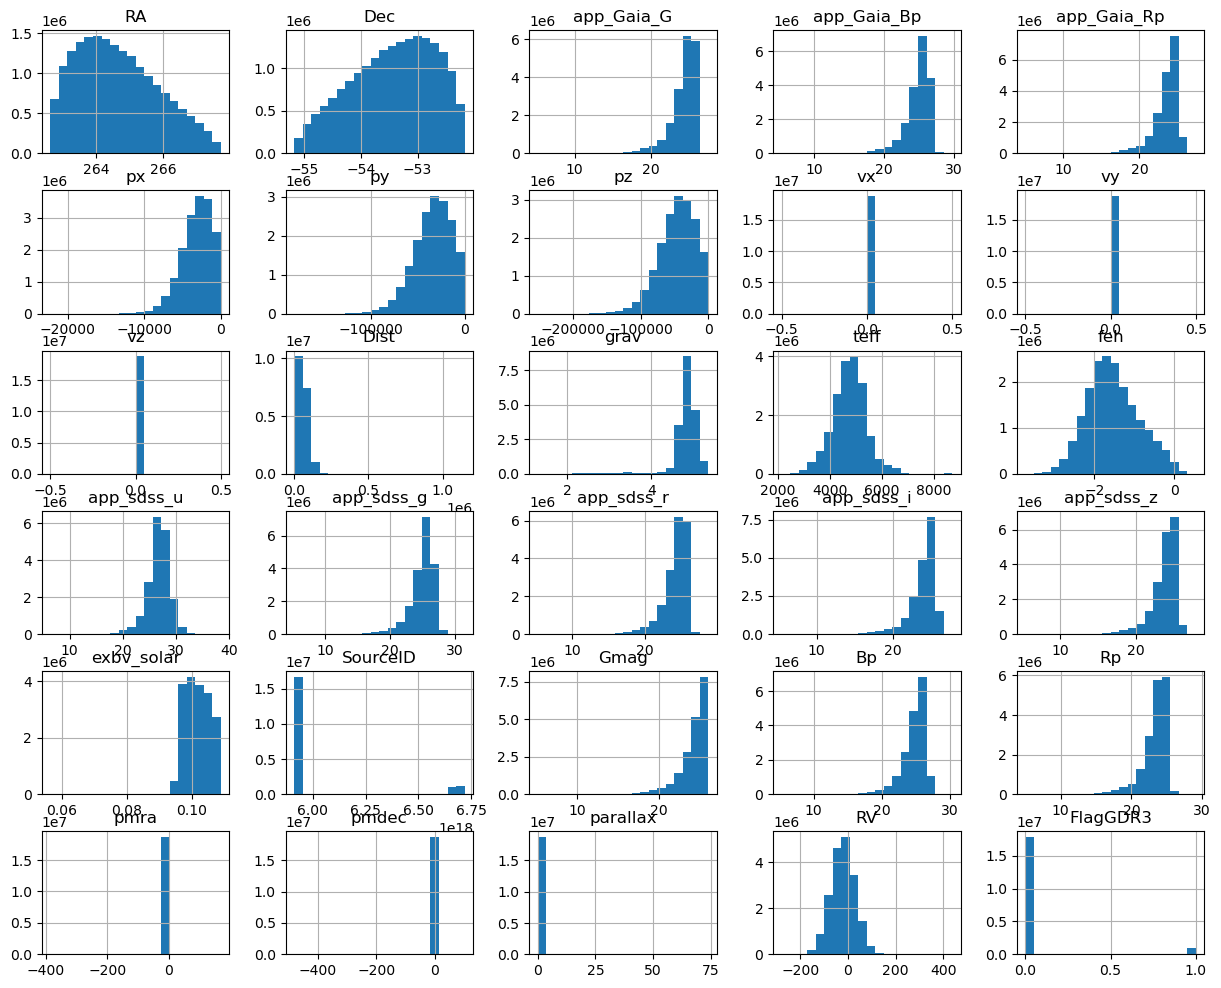

In [6]:
cat_path = '/media/hyz/dwarfcave/data/csst_simulation/simulation_work/data_dir/reference_catalog/CT1.5-N6397-GDR3-G26.0-rev_J2000.fits'
cat_raw = Table.read(cat_path)
cat_raw = cat_raw.to_pandas()
cat_raw.hist(bins=20,figsize=(15,12))
'start'

相关性分析

In [30]:
name_phy = ['RA','Dec','app_sdss_g','Dist','grav','teff','feh',]
# print('phy corr:\n',cat_raw[name_phy].corr())
name_astrom = ['RA','Dec','px','py','pz','pmra','pmdec','parallax','RV']
# print('astrom corr:\n',cat_raw[name_astrom].corr())
name_all = ['grav','teff','feh','app_sdss_g','pmra','pmdec','parallax','RV']
# print('all corr:\n',cat_raw[name_all].corr())
cat_raw_desc = cat_raw[name_all].describe()
cat_selection = cat_raw[name_all]
cat_raw[name_all].corr()

,grav,teff,feh,app_sdss_g,pmra,pmdec,parallax,RV
grav,1.000000,-0.584681,0.113307,0.234867,0.039507,0.033429,0.043744,-0.000195
teff,-0.584681,1.000000,-0.481354,-0.303124,-0.028087,0.005211,-0.129122,0.000223
feh,0.113307,-0.481354,1.000000,0.211229,0.018592,-0.009039,0.103095,0.000222
app_sdss_g,0.234867,-0.303124,0.211229,1.000000,0.217796,0.457120,-0.419578,0.000094
pmra,0.039507,-0.028087,0.018592,0.217796,1.000000,0.293028,-0.214320,-0.000185
pmdec,0.033429,0.005211,-0.009039,0.457120,0.293028,1.000000,-0.519440,0.000266
parallax,0.043744,-0.129122,0.103095,-0.419578,-0.214320,-0.519440,1.000000,0.001140
RV,-0.000195,0.000223,0.000222,0.000094,-0.000185,0.000266,0.001140,1.000000


In [31]:
cat_raw_desc

,grav,teff,feh,app_sdss_g,pmra,pmdec,parallax,RV
count,1.876808e+07,1.876808e+07,1.876808e+07,1.876427e+07,1.876808e+07,1.876808e+07,1.876808e+07,1.876808e+07
mean,4.796112e+00,4.756750e+03,-1.532640e+00,2.505171e+01,-2.647515e-01,-7.112364e-01,3.892044e-02,-2.069391e+01
std,3.762361e-01,6.575885e+02,6.466952e-01,1.792214e+00,9.187572e-01,1.660554e+00,1.077925e-01,5.036297e+01
min,1.309704e+00,2.141462e+03,-3.720833e+00,5.236310e+00,-3.842121e+02,-4.815177e+02,8.706461e-04,-2.783728e+02
25%,4.743850e+00,4.358773e+03,-1.986729e+00,2.428838e+01,-3.557180e-01,-6.326965e-01,1.275976e-02,-5.467032e+01
50%,4.834728e+00,4.769669e+03,-1.589753e+00,2.546438e+01,-1.986294e-01,-4.530045e-01,1.854722e-02,-2.069213e+01
75%,4.977707e+00,5.159531e+03,-1.106399e+00,2.625710e+01,-3.432696e-02,-2.725836e-01,3.110998e-02,1.325419e+01
max,5.352591e+00,8.699253e+03,5.361259e-01,3.153972e+01,1.685697e+02,1.012670e+02,7.402916e+01,4.372059e+02


RA，Dec, RV采样

0

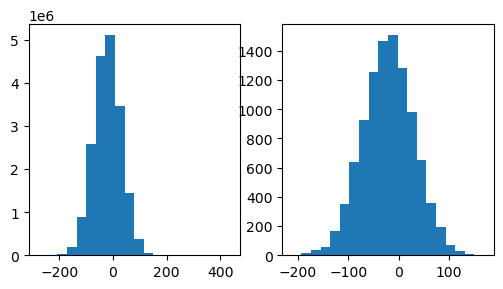

In [5]:
nstar = int(1e4)
ra = np.random.rand(nstar) * 1.4 + 270.3
dec = np.random.rand(nstar) * 1.4 - 41.7

_hist,_edges = np.histogram(cat_raw['RV'],bins=90,range=(-280,440))
_hist = _hist/len(cat_raw['RV'])
_nedges = _edges + (_edges[1]-_edges[0])/2
_nedges = _nedges[:-1]
from scipy.interpolate import CubicSpline
interp = CubicSpline(_nedges,_hist)

# Gibbs 采样
# def starcount_rv_log(x):
#     try:
#         p = interp(x)
#         if p <= 0:
#             p = 1e-20
#         return np.log10(p)
#     except Exception:
#         p = 0
#         if x > _nedges[-1]:
#             p += -10 - 10*(x-_nedges[-1])/(_nedges[-1]-_nedges[0])
#         elif x < _nedges[0]:
#             p += -10 - 10*(_nedges[0]-x)/(_nedges[-1]-_nedges[0])
#         if p > -10:
#             p -= 20
#         return p
    
# from emcee import EnsembleSampler

# nwalkers = 100
# ndim = 1
# psteps = 1000
# nsteps = int(nstar/nwalkers)
# x0 = np.empty((nwalkers,ndim))
# x0[:,0] = np.random.rand(nwalkers) * (438+279) - 279

# sampler = EnsembleSampler(nwalkers,ndim,starcount_rv_log)
# x = sampler.run_mcmc(x0, psteps, progress=True)
# sampler.reset()
# sampler.run_mcmc(x, nsteps, progress=True)
# samples = sampler.get_chain()
# rv = samples.reshape((-1,ndim))


# 拒绝采样
# rv = np.empty(0)
# while len(rv) < nstar:
#     rvi = np.random.rand(int(nstar/100))*(438+279) - 279
#     rvi = rvi[np.random.rand() < interp(rvi)]
#     rv = np.concatenate((rv,rvi))
# rv = rv[:nstar]

# numpy.random.choice
a = np.random.rand(int(1e6))*(438+279) - 279
p = interp(a)
p[p<0] = 0
p = p/np.sum(p)
rv = np.random.choice(a,nstar,p=p)

plt.figure(figsize=(6,3))
plt.subplot(121)
plt.hist(cat_raw['RV'],bins=20)
plt.subplot(122)
plt.hist(rv.T,bins=20)
0

0

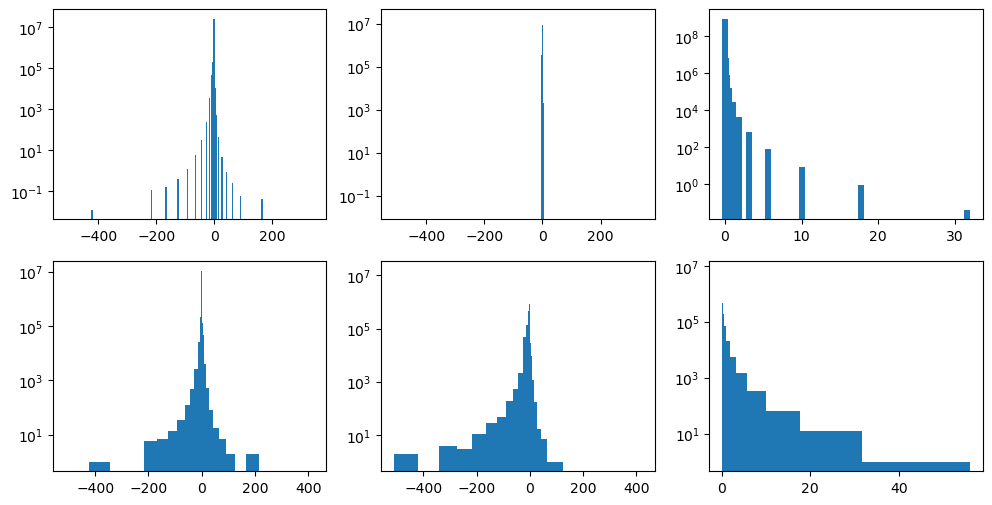

In [17]:
plt.figure(figsize=(12,6))
bins = np.array([np.arange(-8,8,0.5)**3,
                    np.arange(-8,8,0.5)**3,
                    np.float_power(10,np.arange(-8,2,0.25))],dtype=object)
datal = ['pmra','pmdec','parallax']
histl = []
for i in range(3):
    _hist,_edge = np.histogram(cat_raw[datal[i]],bins=bins[i])
    _hist = _hist/(bins[i][1:]-bins[i][:-1])
    histl.append(_hist)
    
plt.subplot(231)
plt.bar(bins[0][:-1],histl[0],width=5,log=True)
# plt.plot(bins[0][:-1],histl[0])
plt.subplot(232)
plt.bar(bins[1][:-1],histl[1],log=True)
plt.subplot(233)
plt.bar(bins[2][:-1],histl[2],log=True)
plt.subplot(234)
plt.hist(cat_raw['pmra'],bins=bins[0],log=True)
plt.subplot(235)
plt.hist(cat_raw['pmdec'],bins=bins[1],log=True)
plt.subplot(236)
plt.hist(cat_raw['parallax'],bins=bins[2],log=True)
0

In [23]:
bins[0].shape

(32,)

<BarContainer object of 8000 artists>

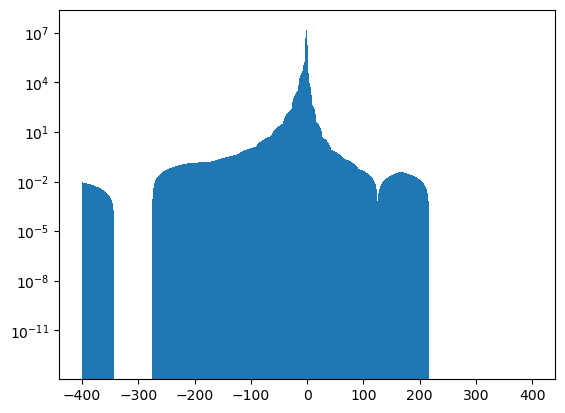

In [25]:
# from scipy.interpolate import RegularGridInterpolator
# interp = RegularGridInterpolator(bins[0][:-1],histl[0],method='linear')
x = np.arange(-400,400,0.1)
plt.bar(x,np.interp(x,bins[0][:-1],histl[0]),log=True)

0

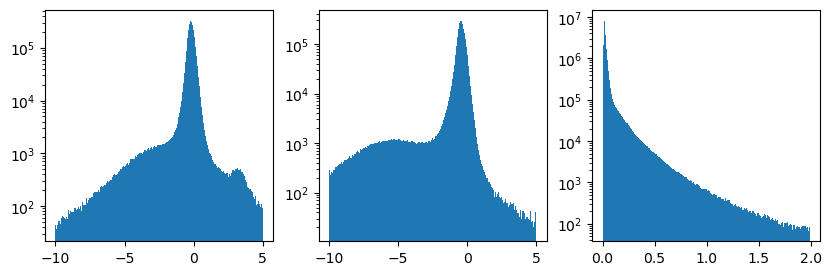

In [14]:
bins = np.arange(-10,5,0.01)
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.hist(cat_raw['pmra'],bins=bins,log=True)
plt.subplot(132)
plt.hist(cat_raw['pmdec'],bins=bins,log=True)
plt.subplot(133)
bins = np.arange(0,2,0.01)
plt.hist(cat_raw['parallax'],bins=bins,log=True)
0

0

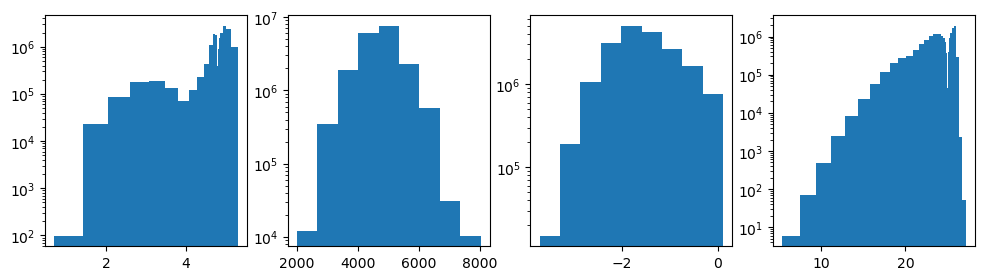

In [ ]:
plt.figure(figsize=(12,3))
bins = np.array([np.arange(-1.6,0.9,0.1)**3+4.8,
                    np.arange(2000,8700,670),
                    np.arange(-3.72,0.54,0.426),
                    np.arange(-2.7,1.8,0.1)**3+25],dtype=object)
plt.subplot(141)
plt.hist(cat_raw['grav'],bins=bins[0],log=True)
plt.subplot(142)
plt.hist(cat_raw['teff'],bins=bins[1],log=True)
plt.subplot(143)
plt.hist(cat_raw['feh'],bins=bins[2],log=True)
plt.subplot(144)
plt.hist(cat_raw['app_Gaia_G'],bins=bins[3],log=True)
0

概率函数统计插值

In [60]:
def stat(df):
    df_selection_len = len(df.columns)
    df_len = len(df)
    df_desc = df.describe()
    bins = np.array([np.arange(-1.6,0.9,0.1)**3+4.8,
                    np.arange(2000,8700,670),
                    np.arange(-3.72,0.54,0.426),
                    np.arange(-2.7,1.8,0.1)**3+25],dtype=object)
    range_ = np.array([df_desc.min()[:],df_desc.iloc[3:].max()[:]]).T
    df_hist,_edges = np.histogramdd(df.to_numpy(),bins,range_)
    np.save('/home/haoyanzhen_shao/project/simulation_work/data_dir/catalog/crowdedField_sampler0318/histgram_phy.npy',np.array([df_hist,_edges],dtype=object))

    # hist调整
    _lens = []
    for i in range(4):
        _lens.append(_edges[i][1:] - _edges[i][:-1])
        _edges[i] = (_edges[i][:-1]+_edges[i][1:])/2
    df_hist = df_hist/_lens[0][:,None,None,None]/_lens[1][None,:,None,None]/_lens[2][None,None,:,None]/_lens[3][None,None,None,:]
    df_hist = df_hist/df_hist.sum()

    # 概率分布函数插值
    from scipy.interpolate import RegularGridInterpolator

    interp = RegularGridInterpolator(_edges,df_hist,method='cubic')
    return interp, _edges

def stat2(df):
    df_len = len(df)
    df_desc = df.describe()
    bins = np.array([np.arange(-8,8,0.5)**3,
                    np.arange(-8,8,0.5)**3,
                    np.float_power(10,np.arange(-8,2,0.25))],dtype=object)
    range_ = np.array([df_desc.min()[:],df_desc.iloc[3:].max()[:]]).T
    df_hist,_edges = np.histogramdd(df.to_numpy(),bins,range_)
    np.save('/home/haoyanzhen_shao/project/simulation_work/data_dir/catalog/crowdedField_sampler0318/histgram_ast.npy',np.array([df_hist,_edges],dtype=object))

    # hist调整
    _lens = []
    for i in range(3):
        _lens.append(_edges[i][1:] - _edges[i][:-1])
        # _edges[i] = (_edges[i][:-1]+_edges[i][1:])/2
        _edges[i] = _edges[i][:-1]
    df_hist = df_hist/_lens[0][:,None,None]/_lens[1][None,:,None]/_lens[2][None,None,:]
    df_hist = df_hist/df_hist.sum()

    # 概率分布函数插值
    from scipy.interpolate import RegularGridInterpolator

    interp = RegularGridInterpolator(_edges,df_hist,method='nearest')
    return interp, _edges


In [61]:
name_groups = []
name_groups.append(name_all[:4])
name_groups.append(name_all[4:-1])
interp_phy, _edge_phy = stat(cat_raw[name_groups[0]])
interp_ast, _edge_ast = stat2(cat_raw[name_groups[1]])


概率函数完整定义

In [28]:
def starcount_phy_log(x):
    ndim = 4
    try:
        p = interp_phy(x)
        if p <= 0:
            p = 1e-20
        return np.log10(p)
    except Exception:
        p = 0
        for i in range(ndim):
            if x[i] > _edge_phy[i][-1]:
                p += -30 - 30*(x[i]-_edge_phy[i][-1])/(_edge_phy[i][-1]-_edge_phy[i][0])
            elif x[i] < _edge_phy[i][0]:
                p += -30 - 30*(_edge_phy[i][0]-x[i])/(_edge_phy[i][-1]-_edge_phy[i][0])
        if p > -10:
            p -= 20
        return p

def starcount_ast_log(x):
    ndim = 3
    try:
        p = interp_ast(x)
        if p <= 0:
            p = 1e-20
        return np.log10(p)
    except Exception:
        p = 0
        for i in range(ndim):
            if x[i] > _edge_ast[i][-1]:
                p += -30 - 100*(x[i]-_edge_ast[i][-1])/(_edge_ast[i][-1]-_edge_ast[i][0])
            elif x[i] < _edge_ast[i][0]:
                p += -30 - 100*(_edge_ast[i][0]-x[i])/(_edge_ast[i][-1]-_edge_ast[i][0])
        if p > -20:
            p -= 20
        return p
    


phy参数采样

In [47]:
from emcee import EnsembleSampler

nwalkers = 100
ndim = 4
psteps = 100
nsteps = int(nstar/nwalkers)
# x[grav,teff,feh,mag_g]
# [ 3.76236096e-01,  5.35259056e+00],
# [ 6.57588529e+02,  8.69925293e+03],
# [-3.72083282e+00,  5.36125898e-01],
# [ 1.68997382e+00,  2.74582329e+01]
x0 = np.empty((nwalkers,4))
x0[:,0] = np.random.rand(nwalkers) * 1.6 + 3.7
x0[:,1] = np.random.rand(nwalkers) * 8000 + 660
x0[:,2] = np.random.rand(nwalkers) * 4 - 3.7
x0[:,3] = np.random.rand(nwalkers) * 25 + 2

sampler = EnsembleSampler(nwalkers,ndim,starcount_phy_log)
sampler.reset()
# samplel = []
# for i in range(nsamples):
#     x0 = sampler.sample(x0)
#     samplel.append(x0)
x = sampler.run_mcmc(x0, psteps, progress=True)
sampler.reset()
sampler.run_mcmc(x, nsteps, progress=True)
samples = sampler.get_chain()
samples.shape
datetime.now()

100%|██████████| 10000/10000 [21:36<00:00,  7.71it/s]


datetime.datetime(2023, 3, 19, 12, 55, 22, 207225)

<Figure size 1000x1000 with 0 Axes>

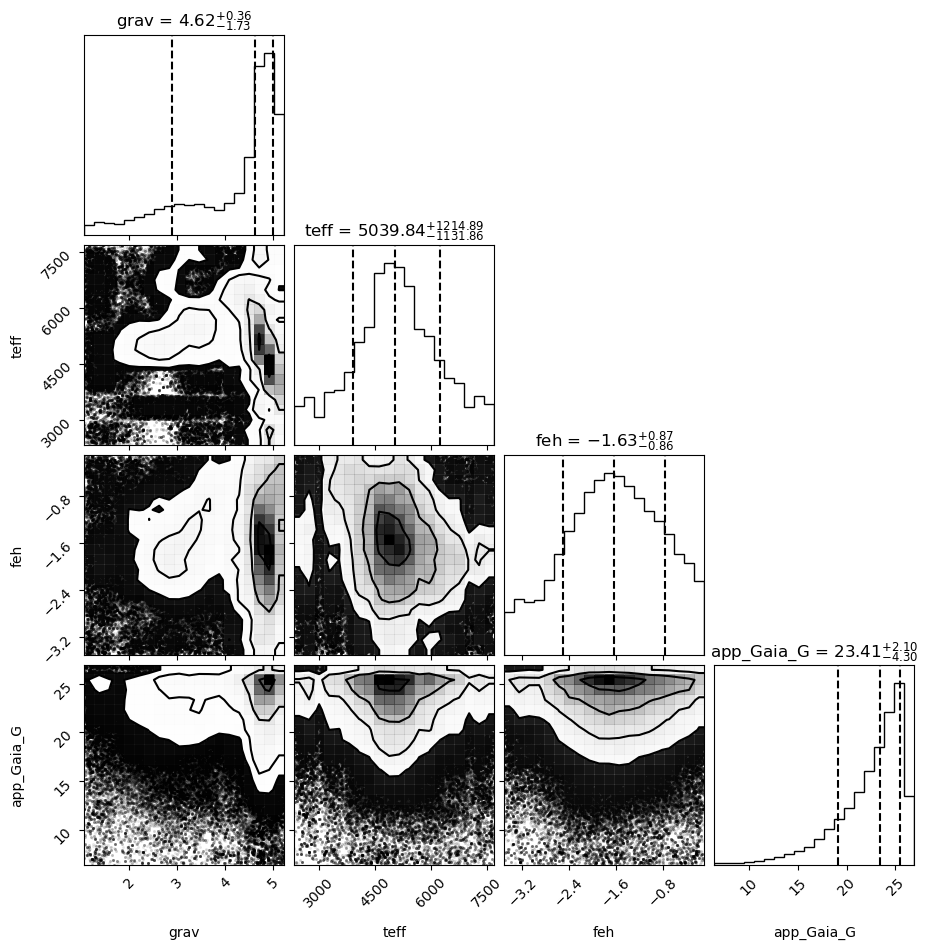

In [48]:
# 采样结果查看
import corner

samples_phy = sampler.get_chain().reshape((-1,ndim))
plt.figure(figsize=(10,10))
fig_ = corner.corner(samples_phy,
                    quantiles=[0.16, 0.5, 0.84],
                    labels=name_all,
                    show_titles=True)


<Figure size 1000x1000 with 0 Axes>

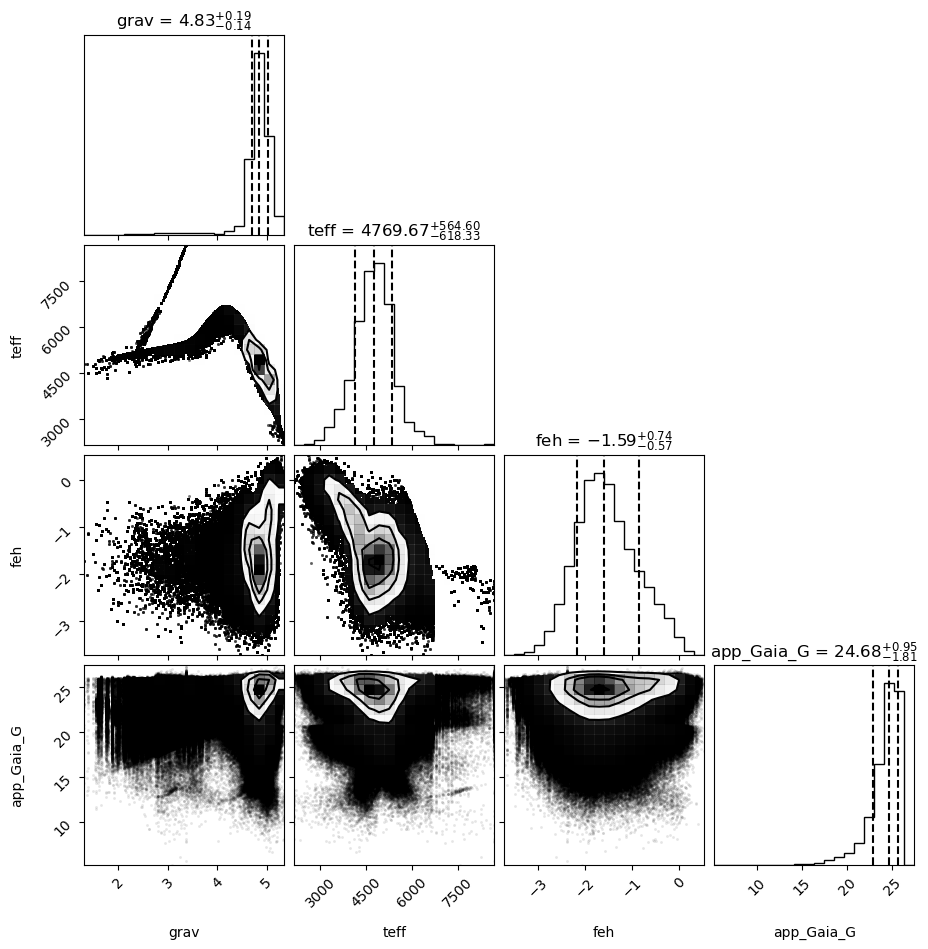

In [32]:
plt.figure(figsize=(10,10))
fig_ = corner.corner(cat_raw[name_groups[0]].dropna(),
                    quantiles=[0.16, 0.5, 0.84],
                    labels=name_groups[0],
                    show_titles=True)

ast参数采样

In [62]:
nwalkers = 100
ndim = 3
psteps = 100
nstar = int(1e5)
nsteps = int(nstar/nwalkers)
# x[mag_g,pmra,pmdec,parallax]
# [ 5.21828318e+00,  2.74582329e+01],
# [-3.84212126e+02,  1.68569655e+02],
# [-4.81517687e+02,  1.01266962e+02],
# [ 8.70646100e-04,  7.40291565e+01]
x0 = np.empty((nwalkers,ndim))
x0[:,0] = np.random.rand(nwalkers) * 500 - 380
x0[:,1] = np.random.rand(nwalkers) * 550 - 480
x0[:,2] = np.random.rand(nwalkers) * 70 + 1

# 不确定mag对pm和pa产生影响的原因，可能是基于星系动力学，由于采样较难，目前假设为均匀分布情况下无影响。
# x_mag = samples_phy[:,-1][:,None]

sampler = EnsembleSampler(nwalkers,ndim,starcount_ast_log)
sampler.reset()
# samplel = []
# for i in range(nsamples):
#     x0 = sampler.sample(x0)
#     samplel.append(x0)
x = sampler.run_mcmc(x0, psteps, progress=True)
sampler.reset()
sampler.run_mcmc(x, nsteps, progress=True)
samples = sampler.get_chain()
samples.shape
datetime.now()

100%|██████████| 1000/1000 [00:18<00:00, 53.14it/s]


datetime.datetime(2023, 3, 19, 13, 26, 51, 570734)

<Figure size 1000x1000 with 0 Axes>

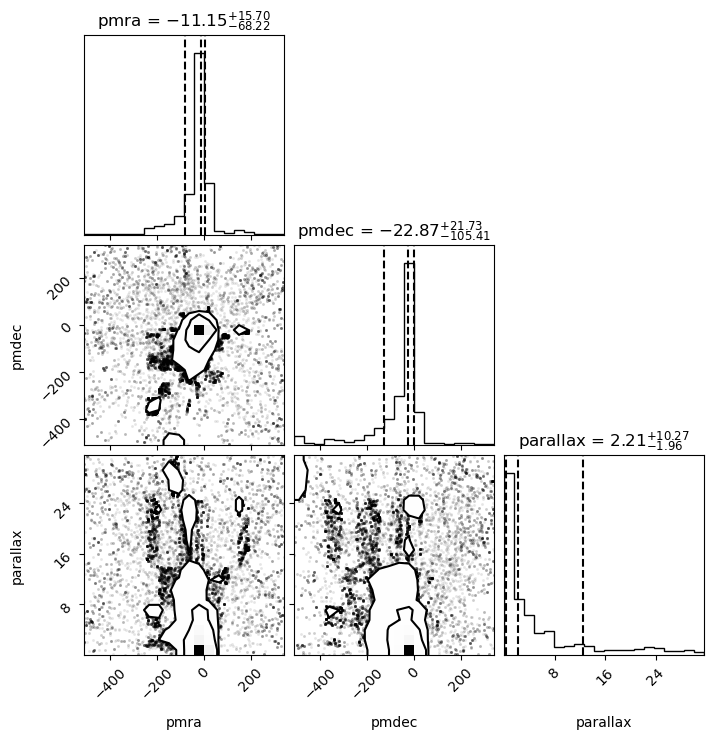

In [63]:
# 采样结果查看
import corner

samples_ast = sampler.get_chain().reshape((-1,ndim))
plt.figure(figsize=(10,10))
fig_ = corner.corner(samples_ast,
                    quantiles=[0.16, 0.5, 0.84],
                    labels=name_groups[1],
                    show_titles=True)


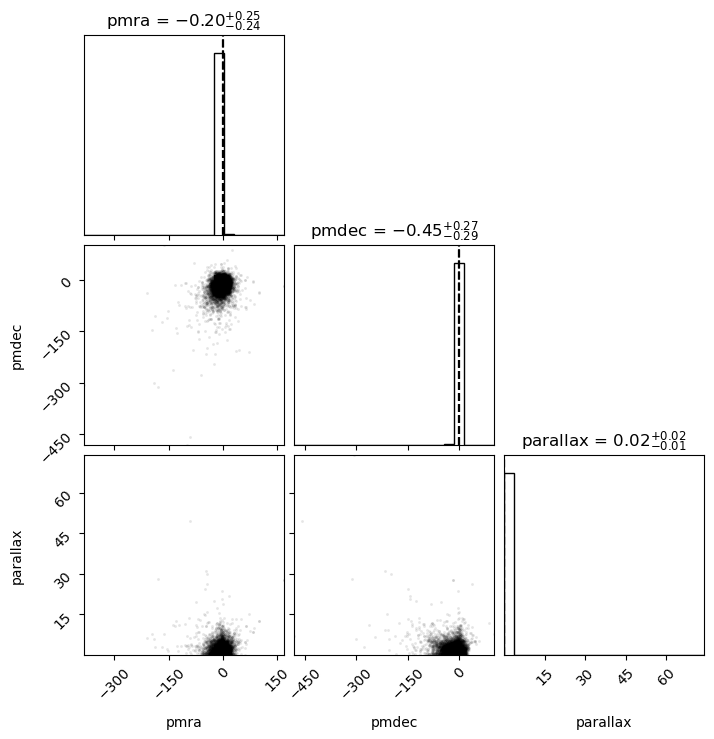

In [ ]:
fig_ = corner.corner(cat_raw[name_groups[1]],
                    quantiles=[0.16, 0.5, 0.84],
                    labels=name_groups[1],
                    show_titles=True)

In [98]:
from scipy.optimize import curve_fit

def norm(x,mu,var):
    return 1/((2*np.pi)**0.5 * var) * np.exp(-(x-mu)**2/var**2)

x = cat_raw['pmra']
bins = np.arange(-400,400,0.01)
_hist, _edge = np.histogram(x,bins)
# popt,pcov,infodict,mesg,flg = curve_fit(norm,_edge[:-1],_hist)
popt,pcov = curve_fit(norm,_edge[:-1],_hist)
popt

array([-0.21740013,  0.01114083])

In [3]:
from scipy.optimize import curve_fit

def norm(x,mu,var):
    return 1/((2*np.pi)**0.5 * var) * np.exp(-(x-mu)**2/var**2)

x = cat_raw['pmdec']
bins = np.arange(-400,400,0.01)
_hist, _edge = np.histogram(x,bins)
# popt,pcov,infodict,mesg,flg = curve_fit(norm,_edge[:-1],_hist)
popt,pcov = curve_fit(norm,_edge[:-1],_hist)
popt

array([-0.46481853,  0.01192411])

In [11]:
def exp(x,k,e):
    return k * 2 ** (-e*x)
x = cat_raw['parallax']
bins = np.arange(0,40,0.01)
_hist, _edge = np.histogram(x,bins)
popt,pcov,info,mesg,flg= curve_fit(exp,_edge[:-1],_hist,full_output=True)
popt,pcov

(array([5.00245474e+06, 4.12375637e+01]),
 array([[5.06931736e+09, 4.06896190e+04],
        [4.06896190e+04, 9.05128553e-01]]))

In [16]:
nstar = int(3e8)
a = np.random.rand(nstar)*10
p = exp(a,popt[0],popt[1])
p /= p.sum()
parallax = np.random.choice(a,size=nstar,p=p)


0

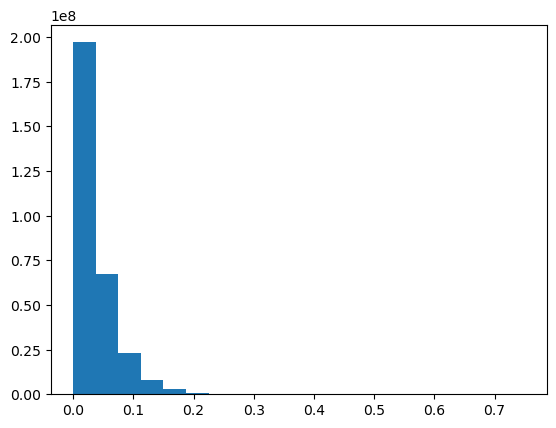

In [17]:
plt.hist(parallax,bins=20)
0

--end--

'--over--'

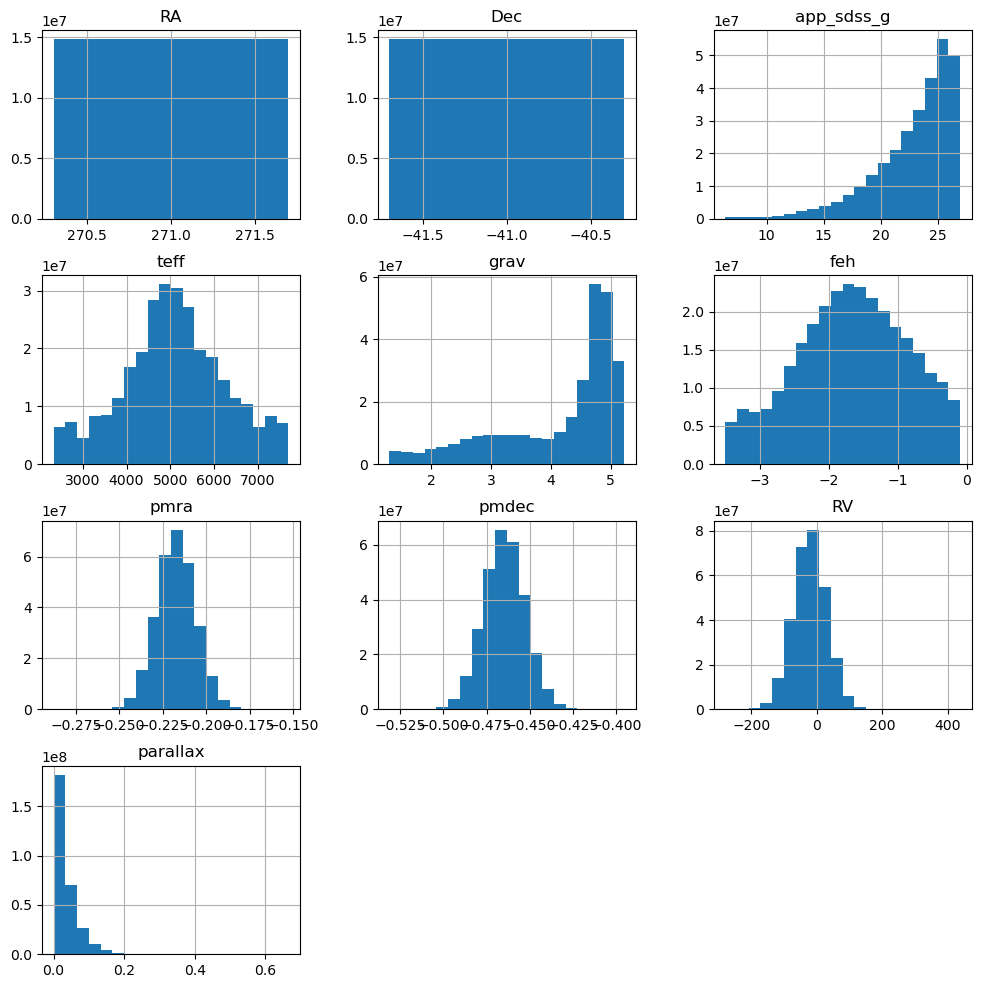

In [1]:
from astropy.table import Table

# 不要在本机运行，会卡死
cat = Table.read('/home/haoyanzhen_shao/project/simulation_work/data_dir/catalog/crowdedField_sampler0318/from_N6397_3e8.fits')
cat = cat.to_pandas()
cat.hist(figsize=(12,12),bins=20)
'--over--'